<a href="https://colab.research.google.com/github/Desmyk/MACHINELEARNING_CAPSTONE/blob/main/PhishingCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Machine Learning Capstone: Phishing Website Detection***

**Author:** Michael Mbugua  
**Project Type:** Machine Learning Capstone  
**Dataset Source:** [Kaggle - Phishing Dataset](https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning)

---

## ***Objective***

The goal of this capstone project is to develop a machine learning model that can detect phishing websites based on various extracted features from URLs and web behavior patterns.

Phishing attacks are a major cybersecurity threat, and automated detection systems can provide critical support to reduce human error, protect user data, and mitigate fraud.

---

## ***Dataset Overview***

The dataset contains **phishing website attributes**, with features such as:

- Presence of IP address in URL
- Length of the URL
- Number of subdomains
- HTTPS usage
- External resource requests

The target variable is `class`, where:
- `1` indicates a **phishing website**
- `0` indicates a **legitimate website**

Let's begin by loading and exploring the dataset :


In [ ]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the phishing dataset
df = pd.read_csv('Phishing_Legitimate_full.csv')
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [ ]:
print(df.shape)

print(df.head())

print(df.info())

print(df.describe())

(10000, 50)
   id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0   1        3               1          5         72        0   
1   2        3               1          3        144        0   
2   3        3               1          2         58        0   
3   4        3               1          6         79        1   
4   5        3               0          4         46        0   

   NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                  0         0            0              0  ...   
1                  0         0            0              2  ...   
2                  0         0            0              0  ...   
3                  0         0            0              0  ...   
4                  0         0            0              0  ...   

   IframeOrFrame  MissingTitle  ImagesOnlyInForm  SubdomainLevelRT  \
0              0             0                 1                 1   
1              0             0                 0      

In [ ]:
# Check for missing values

print(df.isnull().sum())

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


In [ ]:
# Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [ ]:
# Drop duplicate rows (if it had some)
df.drop_duplicates(inplace=True)

In [ ]:
# Remove unnecessary columns
unnecessary_cols = ['id', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'AtSymbol', 'NumDashInHostname', 'TildeSymbol', 'NumPercent', 'PctNullSelfRedirectHyperlinks']
df.drop(unnecessary_cols, axis=1, inplace=True)


In [ ]:
# Target variable distribution (Phishing vs Legitimate)
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable (class)')
plt.xlabel('Class (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.show()

# Check class balance
df['class'].value_counts(normalize=True)

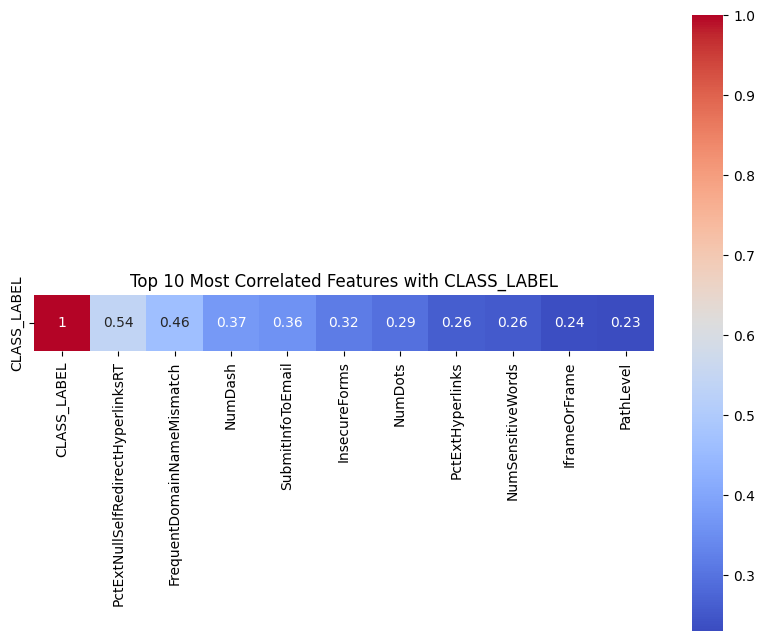

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# top 10 most correlated features with the target variable
top_corr_features = corr_matrix['CLASS_LABEL'].abs().sort_values(ascending=False).head(11)

# a heatmap of the top 10 most correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_features.to_frame().T, annot=True, cmap='coolwarm', square=True)
plt.title("Top 10 Most Correlated Features with CLASS_LABEL")
plt.show()

In [ ]:
# check dataset
df.head()

,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumUnderscore,NumQueryComponents,NumAmpersand,NumHash,NumNumericChars,...,FrequentDomainNameMismatch,FakeLinkInStatusBar,RightClickDisabled,PopUpWindow,SubmitInfoToEmail,IframeOrFrame,MissingTitle,ImagesOnlyInForm,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,3,1,5,72,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,3,1,3,144,0,2,2,1,0,41,...,0,0,0,0,0,0,0,0,1,1
2,3,1,2,58,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,6,79,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,-1,1
4,3,0,4,46,0,0,0,0,0,2,...,1,0,0,0,0,1,0,0,-1,1


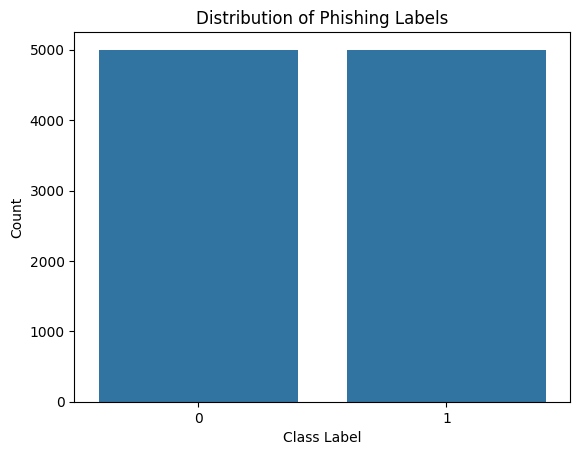

In [ ]:
# Visualize the distribution of the target variable
sns.countplot(x='CLASS_LABEL', data=df)
plt.title('Distribution of Phishing Labels')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()


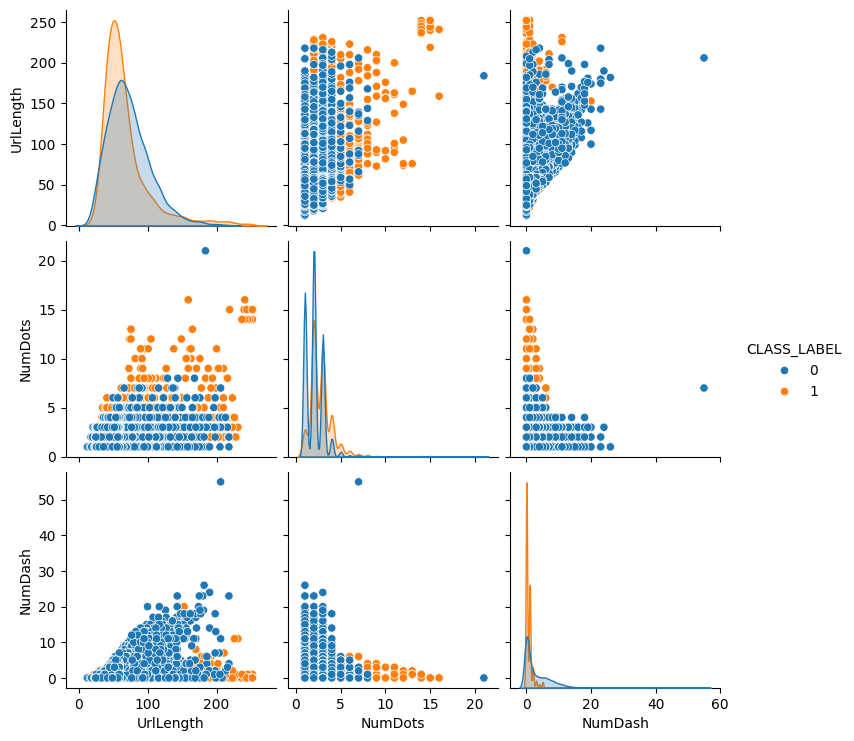

In [ ]:
# Create a pairplot using Seaborn
sns.pairplot(df, vars=['UrlLength', 'NumDots', 'NumDash'], hue='CLASS_LABEL')
plt.show()

In [ ]:
# Split the data into features and target
X = df.drop(['CLASS_LABEL'], axis=1)
y = df['CLASS_LABEL']

In [ ]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# model 1 (Logistic Regression)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter Tune
param_grid = {'penalty': ['l1', 'l2'], 'C': [0.1, 1, 10]}
lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)

print("Best Parameters:", lr_grid_search.best_params_)
print("Best Score:", lr_grid_search.best_score_)

Logistic Regression Model:
Accuracy: 0.9385
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Confusion Matrix:
 [[918  70]
 [ 53 959]]
Best Parameters: {'C': 10, 'penalty': 'l2'}
Best Score: 0.9470000000000001


In [ ]:
# model 2 (Decision Tree)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Decision Tree Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter Tuning
param_grid = {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10]}
dt_grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

print("Best Parameters:", dt_grid_search.best_params_)
print("Best Score:", dt_grid_search.best_score_)

Decision Tree Model:
Accuracy: 0.9715
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       988
           1       0.97      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix:
 [[957  31]
 [ 26 986]]
Best Parameters: {'max_depth': 10, 'min_samples_split': 5}
Best Score: 0.9646250000000001


In [ ]:
# model 3 (Random Forest)

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter Tuning(Grid Search)
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)

print("Best Parameters:", rf_grid_search.best_params_)
print("Best Score:", rf_grid_search.best_score_)


Random Forest Model:
Accuracy: 0.9835
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[971  17]
 [ 16 996]]
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 0.98275


In [ ]:
# model 4 (SVM -Support Vector Machine)

svm_model = SVC()
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

print("\nSVM Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Grid Search(tuning)
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
svm_grid_search.fit(X_train, y_train)

print("Best Parameters:", svm_grid_search.best_params_)
print("Best Score:", svm_grid_search.best_score_)


SVM Model:
Accuracy: 0.9655
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       988
           1       0.96      0.97      0.97      1012

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

Confusion Matrix:
 [[948  40]
 [ 29 983]]
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Best Score: 0.9722500000000001


In [ ]:
# model 5 (Gradient Boosting)

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

print("\nGradient Boosting Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Grid Search(Hyperparam Tune)
param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1]}
gb_grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_train)

print("Best Parameters:", gb_grid_search.best_params_)
print("Best Score:", gb_grid_search.best_score_)


Gradient Boosting Model:
Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

Confusion Matrix:
 [[965  23]
 [ 17 995]]
Best Parameters: {'learning_rate': 0.5, 'n_estimators': 200}
Best Score: 0.986


In [ ]:
# Model 6 (KNN - K-Nearest Neighbors)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print("\nKNN Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparam Tuning(Grid Search)
param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

print("Best Parameters:", knn_grid_search.best_params_)
print("Best Score:", knn_grid_search.best_score_)


KNN Model:
Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       988
           1       0.95      0.95      0.95      1012

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Confusion Matrix:
 [[940  48]
 [ 52 960]]
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.95225


In [ ]:
# Create the optimized models
lr_model = LogisticRegression(**lr_grid_search.best_params_)
dt_model = DecisionTreeClassifier(**dt_grid_search.best_params_)
rf_model = RandomForestClassifier(**rf_grid_search.best_params_)
svm_model = SVC(**svm_grid_search.best_params_)
gb_model = GradientBoostingClassifier(**gb_grid_search.best_params_)
knn_model = KNeighborsClassifier(**knn_grid_search.best_params_)


# Fit the optimized models to the training data
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)


# Evaluate each model on the test set
models = [lr_model, dt_model, rf_model, svm_model, gb_model, knn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'KNN']

accuracies = []
precisions = []
recalls = []
f1_scores = []

for model in models:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

    print(f"{model_names[models.index(model)]}:")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1-score: {f1:.3f}")
    print("")

Logistic Regression:
Accuracy: 0.940
Precision: 0.935
Recall: 0.948
F1-score: 0.941

Decision Tree:
Accuracy: 0.975
Precision: 0.974
Recall: 0.976
F1-score: 0.975

Random Forest:
Accuracy: 0.985
Precision: 0.984
Recall: 0.986
F1-score: 0.985

SVM:
Accuracy: 0.976
Precision: 0.973
Recall: 0.978
F1-score: 0.976

Gradient Boosting:
Accuracy: 0.987
Precision: 0.983
Recall: 0.990
F1-score: 0.987

KNN:
Accuracy: 0.955
Precision: 0.955
Recall: 0.955
F1-score: 0.955



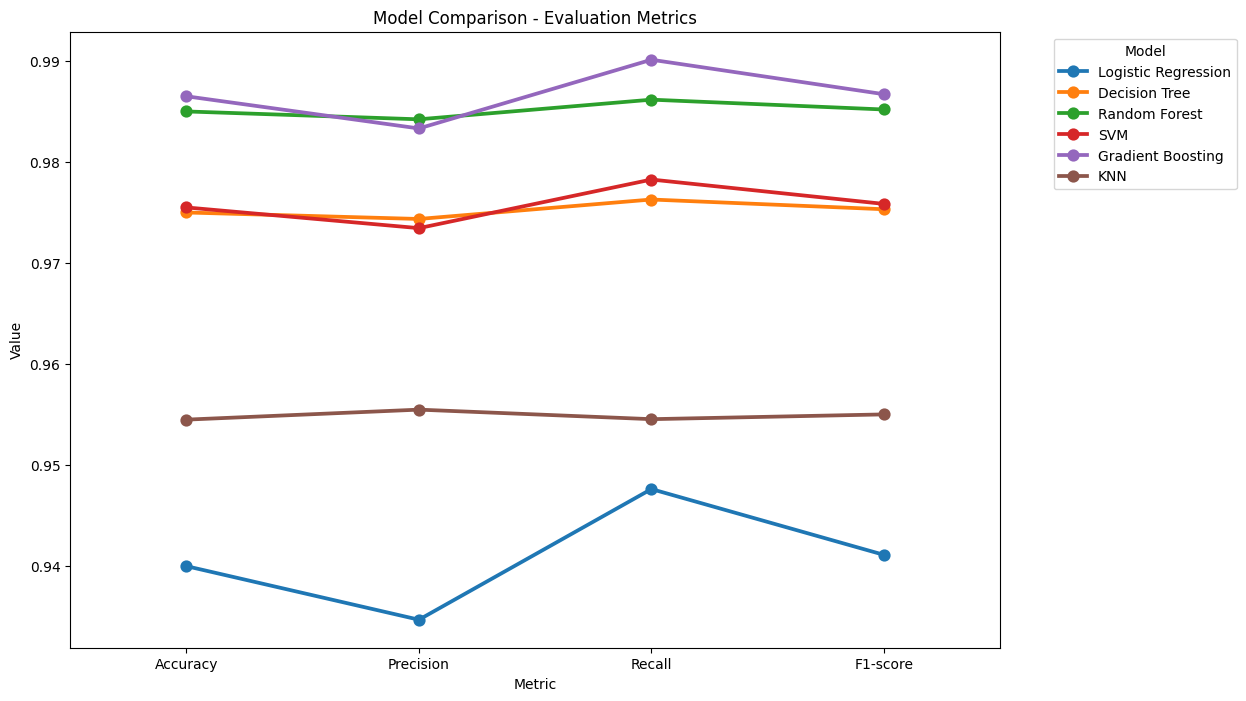

In [ ]:
# Create a dataframe to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1-score': f1_scores
})

# Melt the dataframe to create a long-form dataset
melted_df = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Value')

# Create a single plot with subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Use seaborn to create a pointplot
sns.pointplot(x='Metric', y='Value', hue='Model', data=melted_df, ax=ax)

# Set title and labels
ax.set_title('Model Comparison - Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Legend
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [ ]:
# Make predictions on the test set
predictions = {
    'Logistic Regression': lr_model.predict(X_test),
    'Decision Tree': dt_model.predict(X_test),
    'Random Forest': rf_model.predict(X_test),
    'SVM': svm_model.predict(X_test),
    'Gradient Boosting': gb_model.predict(X_test),
    'KNN': knn_model.predict(X_test),
}

# Print the predictions
for model, pred in predictions.items():
    print(f"Predictions for {model}: {pred}")

Predictions for Logistic Regression: [0 1 1 ... 0 1 0]
Predictions for Decision Tree: [0 1 1 ... 0 1 0]
Predictions for Random Forest: [0 1 1 ... 0 1 0]
Predictions for SVM: [0 1 1 ... 0 1 0]
Predictions for Gradient Boosting: [0 1 1 ... 0 1 0]
Predictions for KNN: [0 1 1 ... 0 1 0]


In [ ]:
# To test Linear Separability and Multicollinearity
# I'll use Linear SVM and Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

# Print VIF values
print(vif)

# Train a linear SVM model
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X, y)

# Predict and evaluate
y_pred = svm_model.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Linear SVM accuracy: {accuracy:.3f}")

            VIF                            features
0     10.793825                             NumDots
1      4.088173                      SubdomainLevel
2      9.375391                           PathLevel
3   8390.017420                           UrlLength
4      4.114042                             NumDash
5      1.572269                       NumUnderscore
6      8.433048                  NumQueryComponents
7      7.010619                        NumAmpersand
8      3.671920                             NumHash
9      3.173787                     NumNumericChars
10    69.346885                             NoHttps
11     2.835799                        RandomString
12     1.459148                           IpAddress
13     1.878062                  DomainInSubdomains
14     2.202517                       DomainInPaths
15          NaN                     HttpsInHostname
16   655.933662                      HostnameLength
17  2597.955565                          PathLength
18   943.410